
Comparison for Information_content_rate:
Control mean: 1.75 ± 0.05
Experimental mean: 1.60 ± 0.06
Mann-Whitney U statistic: 27606.00, p-value: 0.0456

Comparison for Sparsity:
Control mean: 0.30 ± 0.01
Experimental mean: 0.34 ± 0.01
Mann-Whitney U statistic: 22082.00, p-value: 0.0409

Comparison for Selectivity:
Control mean: 12.67 ± 0.63
Experimental mean: 11.68 ± 0.77
Mann-Whitney U statistic: 27288.00, p-value: 0.0774

Comparison for Averate_rate:
Control mean: 0.91 ± 0.06
Experimental mean: 1.18 ± 0.09
Mann-Whitney U statistic: 21480.00, p-value: 0.0129

Comparison for Field_size:
Control mean: 13.18 ± 0.32
Experimental mean: 13.55 ± 0.34
Mann-Whitney U statistic: 23016.50, p-value: 0.1736


C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2935480254.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2935480254.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['CRs +', 'CRs -'])
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2935480254.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2935480254.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['CRs 


Comparison for matlab_stability_smooth1:
Control mean: 0.70 ± 0.02
Experimental mean: 0.70 ± 0.02
Mann-Whitney U statistic: 24215.00, p-value: 0.9765


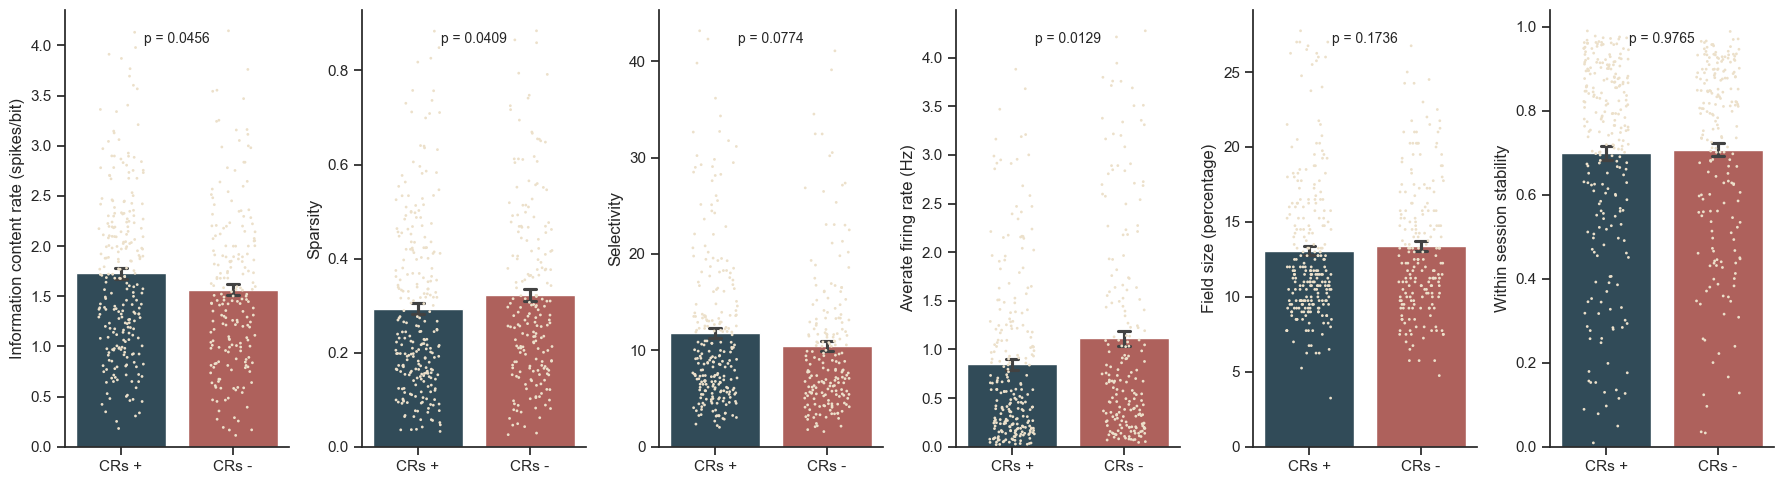

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for loading data, filtering, and setting up variables remains unchanged)
# Assuming df, control_ids, exp_ids, and session are defined as in your original code

df_good = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements_pycirc.pkl')
df_py = df_good[df_good['buzaki_py_cell_type']=='pyramidal']
df = df_py
base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']
sessions = ["A"]


for session in sessions:
    # Filter for sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Set Seaborn theme
    sns.set_theme(style="ticks")

    # Statistical comparisons for scalar metrics
    metrics = ['Information_content_rate', 'Sparsity', 'Selectivity', 'Averate_rate', 'Field_size', 'matlab_stability_smooth1']
    metrics_labels = ['Information content rate (spikes/bit)', 'Sparsity', 'Selectivity', 'Averate firing rate (Hz)', 'Field size (percentage)', 'Within session stability']
    # Create figure with 1 row and 6 columns (one per metric)
    fig, axes = plt.subplots(1, 6, figsize=(18, 5))
    axes = axes.flatten()  # Flatten for easier iteration

    # Define custom colors
    # control_color = sns.color_palette(palette='flag')[-1]  # Dark blue for Control
    # exp_color = "cyan"  # Light blue for Experimental
    control_color = '#2b4d5e'  # Dark blue for Control
    exp_color = '#BC554E'  # Light blue for Experimental

    i4label=0
    for idx, metric in enumerate(metrics):
        control_values = control_df[metric].dropna()
        exp_values = exp_df[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            control_sem = control_values.sem()
            exp_mean = exp_values.mean()
            exp_sem = exp_values.sem()
            
            print(f"\nComparison for {metric}:")
            print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
            print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
            
            # Mann-Whitney U test
            control_array = np.asarray(control_values.values, dtype=float)
            exp_array = np.asarray(exp_values.values, dtype=float)

            # Remove NaN values
            control_clean = control_array[~np.isnan(control_array)]
            exp_clean = exp_array[~np.isnan(exp_array)]

            # Perform Mann-Whitney U test
            u_stat, p_val = stats.mannwhitneyu(control_clean, exp_clean, alternative='two-sided')

            print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")
            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
            all_values = plot_df['value']
            cv = all_values.std() / all_values.mean()  # Coefficient of variation
            use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
            
            # Filter out outliers (e.g., beyond 3 standard deviations)
            mean_val = all_values.mean()
            std_val = all_values.std()
            plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                       (plot_df['value'] <= mean_val + 3 * std_val)]
            
            # Bar plot
            ax = axes[idx]
            sns.barplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=ax,
                palette={"Control": control_color, "Experimental": exp_color},
                errorbar='se',  # Show SEM as error bars
                capsize=0.1,
                alpha=1,
            )
            
            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=ax,
                size=2,
                hue='group',
                palette={"Control": "#ECE0CA", "Experimental": "#ECE0CA"},
                alpha=1,
                jitter=0.2,
                legend=False
            )
            
            # Set title and labels for bar plot
            #ax.set_title(f'{metric} Comparison')
            ax.set_ylabel(metrics_labels[idx])
            ax.set_xlabel('Group')
            ax.yaxis.grid(False)
            ax.set(xlabel="")
            ax.set_ylim(0)
            ax.set_xticklabels(['CRs +', 'CRs -'])
            # Add p-value at the top of the bar plot
            ax.text(0.5, 0.95, f'p = {p_val:.4f}', 
                    horizontalalignment='center', 
                    verticalalignment='top', 
                    transform=ax.transAxes, 
                    fontsize=10)
            
            # Remove top and right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(True)
        i4label =+ 1

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Function to load and plot an image with dynamic size adjustment
def plot_image_at_xy(ax, img_path, x, y, max_size=0.09):
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        img_height, img_width = img.shape[:2]
        aspect_ratio = img_width / img_height

        # Calculate zoom based on max_size and aspect ratio
        trans = ax.transData
        fig = ax.get_figure()
        dpi = fig.dpi
        xlim = ax.get_xlim()
        data_width = xlim[1] - xlim[0]
        bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        axes_width_pixels = bbox.width * dpi
        pixels_per_data = axes_width_pixels / data_width
        size_pixels = max_size * pixels_per_data
        zoom = size_pixels / max(img_width, img_height / aspect_ratio)

        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        ax.add_artist(ab)
        return ab
    else:
        print(f"Image {img_path} not found")
        return None

In [2]:
# 假设你的数据是一个Series
df_con = control_df.reset_index(drop=True)['Information_content_rate']
df_exp = exp_df.reset_index(drop=True)['Information_content_rate']
def group_indices_by_step(df_col, step=0.075):
    used_indices = set()
    result = []
    values = df_col.copy()
    max_val = values.max()

    while len(used_indices) < len(values):
        remaining = values[~values.index.isin(used_indices)]
        if remaining.empty:
            break

        current_group = []
        current_val = remaining.min()
        current_idx = remaining.idxmin()
        current_group.append(current_idx)
        used_indices.add(current_idx)

        while True:
            target_val = current_val + step
            remaining = values[~values.index.isin(used_indices)]
            if remaining.empty:
                break

            # 找到大于等于 target_val 的值中最接近 target_val 的那个
            diffs = remaining - target_val
            diffs = diffs[diffs >= 0]
            if diffs.empty:
                break

            next_idx = diffs.idxmin()
            current_val = values[next_idx]
            current_group.append(next_idx)
            used_indices.add(next_idx)

        result.append(current_group)

    return result
results_con = group_indices_by_step(df_con)
results_exp = group_indices_by_step(df_exp)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7.2, 11), dpi=1200)
plt.rcParams.update({'font.size': 7,'font.family': 'DejaVu Sans'})
gs = gridspec.GridSpec(8, 6, height_ratios=[1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5], width_ratios=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8])  # First row taller
plt.rcParams.update({
    'axes.labelpad': -0.1,
    'ytick.major.pad': -0.1,
    'xtick.major.pad': -0.1,
    'ytick.major.size': 2,
    'xtick.major.size': 2
})

def plot_rate_map_panel(ax, results_con, df, group = "control", map_color='jet'):
    i_row = 0
    base_y = 0.35
    y_step = 0.5

    for indices in results_con:
        y_coord = base_y + (i_row * y_step)

        if len(indices) > 0:
            values = [df[i] for i in indices]
            num_ratemaps = len(indices)
            for i, (idx, value) in enumerate(zip(indices, values)):
                img_path = fr"Q:\sachuriga\CR_CA1_paper\Results\rate map histogram\{group}/{map_color}/{idx}.png"
                plot_image_at_xy(ax, img_path, value, y_coord, max_size=0.014)
        i_row += 1
    ax.set_xlim(0, 4.5)
    ax.set_ylim(0, 7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', labelsize=10.5)
    ax.set_xlabel("Information Content Rate (spikes / bit)", fontsize=10.5)
    ax.set_yticks([])
    ax.vlines(x=[1, 2, 3, 4], ymin=0, ymax=8.5, colors='grey', linestyles='dashed', linewidth=3)
    
# Function to load and plot an image with dynamic size adjustment
def plot_image_at_xy(ax, img_path, x, y, max_size=0.09):
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        img_height, img_width = img.shape[:2]
        aspect_ratio = img_width / img_height

        # Calculate zoom based on max_size and aspect ratio
        trans = ax.transData
        fig = ax.get_figure()
        dpi = fig.dpi
        xlim = ax.get_xlim()
        data_width = xlim[1] - xlim[0]
        bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        axes_width_pixels = bbox.width * dpi
        pixels_per_data = axes_width_pixels / data_width
        size_pixels = max_size * pixels_per_data
        # zoom = size_pixels / max(img_width, img_height / aspect_ratio)

        # imagebox = OffsetImage(img, zoom=zoom)
        # ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        # ax.add_artist(ab)


        zoom = 0.02  # Adjust this value to control ratemap size
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
        ax.add_artist(ab)
        return ab
    else:
        print(f"Image {img_path} not found")
        return None
    
# First row: use all columns for plot_rate_map_panel
ax1 = fig.add_subplot(gs[0:2, :])
plot_rate_map_panel(ax1, results_con, df_con)

# Second row: 3 columns
ax2 = fig.add_subplot(gs[2:4, :])
plot_rate_map_panel(ax2, results_exp, df_exp, group = "exp")

# Third row: 3 columns, spi cdf distributions
ax3_1 = fig.add_subplot(gs[4:6, 0:2])
sns.ecdfplot(data=control_df['Information_content_rate'].values, color='blue',ax=ax3_1)
sns.ecdfplot(data=exp_df['Information_content_rate'].values, color='red',ax=ax3_1)
ax3_1.axvline(x=1.79, color='red', linestyle='--', label='1.69')
ax3_1.spines['right'].set_visible(False)
ax3_1.spines['top'].set_visible(False)
ax3_1.set_ylabel('%Neurons')
ax3_1.set_yticks([0,0.5,1])
ax3_1.set_yticklabels([0,50,100])



ax3_2 = fig.add_subplot(gs[4:5, 2:5])
# Define bin size and x-axis limits
bin_size = 0.1  # Adjust this based on your data scale
x_min = 0       # Adjust based on your data range
# Flatten into a single list
array_of_lists = control_df['Information_content_rate_shuffle'].values
flattened_list = [item for sublist in array_of_lists for item in sublist]
flattened_array = np.array(flattened_list)
x_max = 4.5       # Adjust based on your data range
ax3_2.axvline(x=1.79, color='red', linestyle='--', label='1.78')
ax3_2.spines['right'].set_visible(False)
ax3_2.spines['top'].set_visible(False)

# Calculate number of bins based on bin size
bins = np.arange(x_min, x_max + bin_size, bin_size)
array_of_lists = control_df['Information_content_rate_shuffle'].values
# Create histogram
hist, bin_edges = np.histogram(flattened_array, bins=bins,density=True)
ax3_2.stairs(hist,bin_edges, fill=True, facecolor="black")

#ax3_2.hist(flattened_array, bins=bins, edgecolor=None, color='blue', alpha=0.7, density=True)
ax3_2.set_xlim(x_min, x_max)
ax3_2.set_ylabel('Density')
ax3_2.set_xlabel('Information Content Rate (spikes / bit)').set_visible(False)

ax3_3 = fig.add_subplot(gs[5:6, 2:5])
bin_size = 0.1  # Adjust this based on your data scale
x_min = 0       # Adjust based on your data range
# Flatten into a single list
con_sp =  control_df['Information_content_rate'].values
exp_sp =  exp_df['Information_content_rate'].values
x_max = 4.5       # Adjust based on your data range

hist, bin_edges = np.histogram(con_sp, bins=bins,density=True)
ax3_3.stairs(hist,bin_edges, fill=True, facecolor="blue", alpha=0.7)
hist, bin_edges = np.histogram(exp_sp, bins=bins,density=True)
ax3_3.stairs(hist,bin_edges, fill=True, facecolor="red", alpha=0.7)
ax3_3.axvline(x=1.79, color='red', linestyle='--', label='1.78')
ax3_3.set_xlim(x_min, x_max)
ax3_3.set_xlabel('Information Content Rate')
ax3_3.set_ylabel('Density')
ax3_3.spines['right'].set_visible(False)
ax3_3.spines['top'].set_visible(False)


ax3_4 = fig.add_subplot(gs[4:6, 5])
# Third row: 4 columns
ax4_1 = fig.add_subplot(gs[6:8, 0])
ax4_2 = fig.add_subplot(gs[6:8, 1])
ax4_3 = fig.add_subplot(gs[6:8, 2])
ax4_4 = fig.add_subplot(gs[6:8, 3])
ax4_5 = fig.add_subplot(gs[6:8, 4:6])
#ax4_6 = fig.add_subplot(gs[7, 4:6])

# Example: you can plot placeholder content
idx=0
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements_pycirc.pkl')
test_hy = ['greater','less','greater','less','two-sided']
for ax in [ax3_4, ax4_1,ax4_2,ax4_3,ax4_4]:
    # Load Good units

    df_good = df_loaded[df_loaded['unit_quality'] == "good"]
    df_a  = df_good[(df_good['buzaki_cell_type']=='pyramidal') & (df_good['session'] == "A")]

    base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"
    control_ids = ['65165', '65091', '63383', '66539', '65622']
    exp_ids = ['65588', '63385', '66538', '66537', '66922']
    session = ["A", "B", "C", "Total"]

    # ... (Your existing code for loading data, filtering, and setting up the figure remains unchanged)
    

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Statistical comparisons for scalar metrics
    metrics = ['Information_content_rate', 'Sparsity', 'Selectivity', 'Field_size', 'matlab_stability_smooth1']
    titles = ['Information content rate\n (spikes/bit)', 'Sparsity', 'Selectivity', 'Field size', 'stability']

    # Define custom colors
    control_color = 'blue'  # Dark blue for Control
    exp_color = "red"  # Light blue for Experimental
    metric=metrics[idx]
    control_values = control_df[metric].dropna()
    exp_values = exp_df[metric].dropna()
    
    if len(control_values) > 0 and len(exp_values) > 0:
        control_mean = control_values.mean()
        exp_mean = exp_values.mean()
        control_sem = control_values.sem()
        exp_sem = exp_values.sem()
        print(f"\nComparison for {metric}:")
        print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
        print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
        
        # Mann-Whitney U test
        control_array = np.asarray(control_values.values, dtype=float)
        exp_array = np.asarray(exp_values.values, dtype=float)

        # Remove NaN values
        control_clean = control_array[~np.isnan(control_array)]
        exp_clean = exp_array[~np.isnan(exp_array)]

        u_stat, p_val = stats.mannwhitneyu(control_clean, exp_clean, alternative = test_hy[idx])

        # Prepare data for Seaborn plotting
        plot_df = pd.DataFrame({
            'value': pd.concat([control_values, exp_values]),
            'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
        })
        
        # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
        all_values = plot_df['value']
        cv = all_values.std() / all_values.mean()  # Coefficient of variation
        use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
        
        # Filter out outliers (e.g., beyond 3 standard deviations)
        mean_val = all_values.mean()
        std_val = all_values.std()
        plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                (plot_df['value'] <= mean_val + 3 * std_val)]
        
        sns.violinplot(
                data=plot_df_filtered, x='group', y='value', ax=ax,inner = None,
                palette={"Control": control_color, "Experimental": exp_color}, width=0.8, cut=0, linewidth=0
            )
        # Add individual points with matching colors
        sns.boxplot(
            data=plot_df_filtered, 
            x='group', y='value',
            palette={"Control": "black", "Experimental": "black"},
            width=0.3, 
            fill=False,  # No fill, only outlines
            showfliers=False,  # Hide outliers
            showmeans=False,  # Remove mean marker, assuming midline is the median
            linewidth=1,  # Makes the lines narrower (thinner)
            ax=ax  # Add this
        )
        ax.set_ylabel(titles[idx])
        ax.set_xlabel('')
        ax.yaxis.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.set_xticklabels(['CR;DTA-', 'CR;DTA+'], rotation = -45)
        y_max = ax.get_ylim()[1]
        bar_height = y_max * 0.1  # Adjust this value to position the bar above the plot
        x_positions = [0, 1]  # Adjusted positions for 'Control' and 'Experimental' groups
        if (p_val < 0.05) & (p_val > 0.01):
            ax.plot([x_positions[0], x_positions[1]], [y_max + bar_height, y_max + bar_height], 
                                color='black', lw=1.5)
            ax.text(0.5, y_max + bar_height * 1.1, f'*', ha='center', va='bottom')
        elif (p_val < 0.01) & (p_val > 0.001):
            ax.plot([x_positions[0], x_positions[1]], [y_max + bar_height, y_max + bar_height], 
                                color='black', lw=1.5)
            ax.text(0.5, y_max + bar_height * 1.1, f'**', ha='center', va='bottom')
        elif p_val < 0.001:
            ax.plot([x_positions[0], x_positions[1]], [y_max + bar_height, y_max + bar_height], 
                                color='black', lw=1.5)
            ax.text(0.5, y_max + bar_height * 1.1, f'***', ha='center', va='bottom')
    idx += 1
    print(idx)

import matplotlib.pyplot as plt

# Data
groups = ['CR;DTA-', 'CR;DTA+']
counts = [
    [36, 64],  # Group 1: Dark blue (71.4%), Light blue (28.6%)
    [25.6, 74.4],  # Group 2: Dark blue (71.1%), Light blue (28.9%)
]
percentages = [
    [36, 64],  # Group 1: Dark blue (71.4%), Light blue (28.6%)
    [25.6, 74.4],  # Group 2: Dark blue (71.1%), Light blue (28.9%)
]

# Colors
colors = ['blue', 'lightblue']  # For CRs +
colors1 = ['red', '#FF6666']    # For CRs -

# Create bar chart
ax = ax4_5 

# Set positions for bars to be closer
bar_width = 0.35  # Reduced width to bring bars closer
x = np.arange(len(groups))  # Create positions for the bars
x = x * 0.5  # Scale x positions to reduce gap between bars

# Plot stacked bars
bars = []
for i in range(len(counts[0])):  # For each category (0 and 1)
    # Create bars for each group with appropriate colors
    bar = ax.bar(x, [counts[j][i] for j in range(len(counts))], 
                 bottom=[sum(counts[j][:i]) for j in range(len(counts))], 
                 color=[colors[i] if j == 0 else colors1[i] for j in range(len(counts))], 
                 label=f'Category {i+1}' if i == 0 else None, 
                 width=bar_width)
    bars.append(bar)

# Add count and percentage labels on top of each segment
for i, bar_group in enumerate(bars):
    if i==0:
        cell_type = "(Place cell)"
    else:
        cell_type = "(None \nplace cell)"
    for j, bar in enumerate(bar_group):
        height = bar.get_height()
        total = sum(counts[j])
        bottom = sum(counts[j][:i])
        ax.text(bar.get_x() + bar.get_width()/2, bottom + height/2, 
                f'{percentages[j][i]}%\n {cell_type}', ha='center', va='center', rotation=0, color='white')

# Customize the plot
ax.set_ylabel('%Neurons')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation = -45)
ax.legend().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
p_val = 0.0437
y_max = ax.get_ylim()[1]
bar_height = y_max * 0.1  # Adjust this value to position the bar above the plot
x_positions = x  # Adjusted positions for 'Control' and 'Experimental' groups
if (p_val < 0.05) & (p_val > 0.01):
    ax.plot([x_positions[0], x_positions[1]], [y_max + bar_height, y_max + bar_height], 
                        color='black', lw=1.5)
    ax.text(x[1]*0.5, y_max + bar_height * 1.1, f'*', ha='center', va='bottom')
#plt.rcParams.update({'font.size': 7})
plt.tight_layout()
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.1, right=0.95, hspace=1.1, wspace=1.3)
plt.savefig(r'Q:/sachuriga/CR_CA1_paper/Figures/fig3.png', transparent=True, dpi=1200, bbox_inches='tight')
plt.show()


Comparison for Information_content_rate:
Control mean: 1.75 ± 0.05
Experimental mean: 1.59 ± 0.06
1

Comparison for Sparsity:
Control mean: 0.30 ± 0.01
Experimental mean: 0.34 ± 0.01
2

Comparison for Selectivity:
Control mean: 12.68 ± 0.63
Experimental mean: 11.65 ± 0.77
3

Comparison for Field_size:
Control mean: 13.19 ± 0.32
Experimental mean: 13.51 ± 0.33


C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2253062731.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2253062731.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2253062731.py:241: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['CR;DTA-', 'CR;DTA+'], rotation = -45)
C:\Users\sachur\AppData\Local\Temp\ipykernel_17744\2253062731.py:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

4

Comparison for matlab_stability_smooth1:
Control mean: 0.69 ± 0.02
Experimental mean: 0.70 ± 0.02
5
